<a href="https://colab.research.google.com/github/trevinofernando/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from random import randrange
from scipy import stats
import numpy as np
import random

#load the digits dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

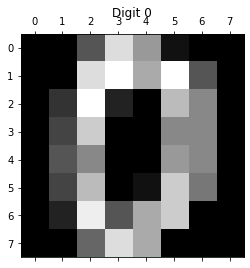

<Figure size 432x288 with 0 Axes>

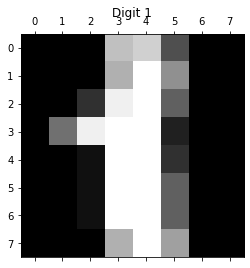

<Figure size 432x288 with 0 Axes>

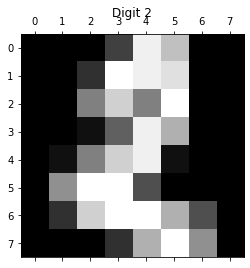

<Figure size 432x288 with 0 Axes>

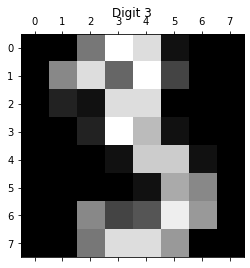

<Figure size 432x288 with 0 Axes>

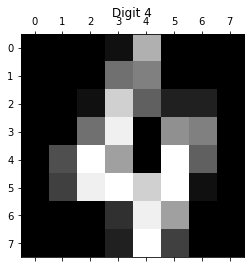

<Figure size 432x288 with 0 Axes>

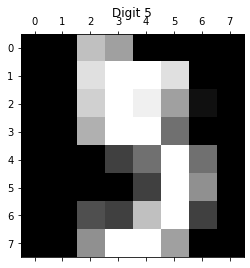

<Figure size 432x288 with 0 Axes>

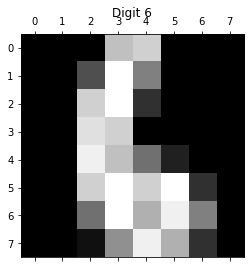

<Figure size 432x288 with 0 Axes>

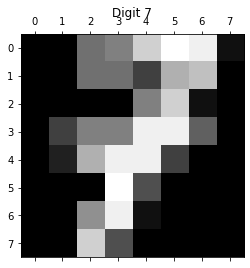

<Figure size 432x288 with 0 Axes>

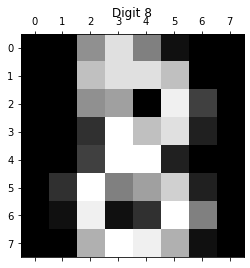

<Figure size 432x288 with 0 Axes>

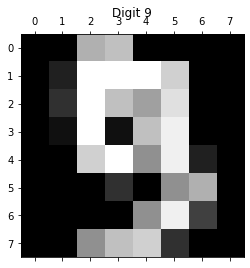

In [11]:
#let's take a look at how some digits look
for img in range(10):
  plt.gray()
  plt.matshow(digits.images[img])
  plt.title("Digit {0}".format(digits.target[img]))
  plt.show()

In [12]:
# prepare datasets from training and for validation
#These arrays will contain all images labeled wit at X at index X
x_train_ordered = [0] * digits.target_names.size
y_train_ordered = [0] * digits.target_names.size
x_test_ordered =  [0] * digits.target_names.size
y_test_ordered =  [0] * digits.target_names.size
#These lists will have the final shuffled dataset with 500 samples for testing
x_train = []
y_train = []
x_test  = []
y_test  = []

firstLoop = True
for label in digits.target_names:
  (indexesOfDigitsWithLabel, ) = np.where(digits.target == label)
  print("There are {0} digits with label {1}".format((indexesOfDigitsWithLabel.size), label))
  
  #Randomize 
  random.shuffle(indexesOfDigitsWithLabel)
  #split the dataset in train, 50 samples of each label, and the rest for testing
  x_train_ordered[label] = digits.data  [indexesOfDigitsWithLabel[:-50]]
  y_train_ordered[label] = digits.target  [indexesOfDigitsWithLabel[:-50]]
  x_test_ordered[label]  = digits.data[indexesOfDigitsWithLabel[-50:]]
  y_test_ordered[label]  = digits.target[indexesOfDigitsWithLabel[-50:]]
  
  #Set list to array in the first iteratino, then concatenate the rest
  if(firstLoop):
    firstLoop = False
    x_train = x_train_ordered[label]
    y_train = y_train_ordered[label]
    x_test  = x_test_ordered[label]
    y_test  = y_test_ordered[label]
  else:
    x_train = np.concatenate((x_train, x_train_ordered[label]),axis=0)
    y_train = np.concatenate((y_train, y_train_ordered[label]),axis=0)
    x_test  = np.concatenate((x_test, x_test_ordered[label]),axis=0)
    y_test  = np.concatenate((y_test, y_test_ordered[label]),axis=0)

  print("--->from which {0} will be used for x_train".format(len(x_train_ordered[label])))
  print("--->from which {0} will be used for y_train".format(len(y_train_ordered[label])))
  print("--->from which {0} will be used for x_test".format(len(x_test_ordered[label])))
  print("--->from which {0} will be used for y_test".format(len(y_test_ordered[label])))

#turn into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test  = np.array(x_test)
y_test  = np.array(y_test)

There are 178 digits with label 0
--->from which 128 will be used for x_train
--->from which 128 will be used for y_train
--->from which 50 will be used for x_test
--->from which 50 will be used for y_test
There are 182 digits with label 1
--->from which 132 will be used for x_train
--->from which 132 will be used for y_train
--->from which 50 will be used for x_test
--->from which 50 will be used for y_test
There are 177 digits with label 2
--->from which 127 will be used for x_train
--->from which 127 will be used for y_train
--->from which 50 will be used for x_test
--->from which 50 will be used for y_test
There are 183 digits with label 3
--->from which 133 will be used for x_train
--->from which 133 will be used for y_train
--->from which 50 will be used for x_test
--->from which 50 will be used for y_test
There are 181 digits with label 4
--->from which 131 will be used for x_train
--->from which 131 will be used for y_train
--->from which 50 will be used for x_test
--->from whi

In [13]:
#verify shape looks good
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1297, 64)
(1297,)
(500, 64)
(500,)


In [14]:
def distance(a, b):
  #Square root of the sum along the rows of the Square of the difference between a and b... magic, no touch!
  #b needs to have the same row shape as a and b needs to be a vector
  return np.sqrt(np.sum(np.multiply(np.subtract(a,b),np.subtract(a,b)), axis=1))

In [15]:
#returns accuarcy on prediction of test data with train data
def Find_Nearest_Neightbor(this_x_train, this_x_test, this_y_train, this_y_test, K):
  accuarcy = 0.0
  count = 0.0

  #Get vector dimensions
  rows_train, cols = this_x_train.shape
  rows_test = this_y_test.size
  
   #special case for just testing 1 item
  if(rows_test == 1):
    this_x_test = [this_x_test]
    this_y_test = [this_y_test]

  for i in range(rows_test):
    dist_train = distance(this_x_train, this_x_test[i]) #calcualte distance for each test row along all train points
    indexes = np.argpartition(dist_train, K)[:K] #Get indexes of the K Nearest Neightbors
    prediction = stats.mode(this_y_train[indexes])[0][0] #count votes from KNN and get the winner (mode)
    if(prediction == this_y_test[i]):
      count += 1.0
  accuarcy = count / rows_test
  if(rows_test == 1):
    return prediction #special case for just testing 1 item
  return accuarcy

In [16]:
#Different k's to test
ks = np.array([1,3,5,7])
avgAcc = np.zeros(ks.size)
accuracies = np.zeros(ks.size)

#For each k
for i in range(ks.size):
  accuracies[i] = Find_Nearest_Neightbor(x_train, x_test, y_train, y_test, ks[i])
  avgAcc[i] += accuracies[i]
  print("Accuracy for {} Nearest Neightbors is {}".format(ks[i], accuracies[i]))


Accuracy for 1 Nearest Neightbors is 0.982
Accuracy for 3 Nearest Neightbors is 0.978
Accuracy for 5 Nearest Neightbors is 0.982
Accuracy for 7 Nearest Neightbors is 0.98


In [30]:
#Different k's to test
ks = np.array([1,3,5,7])
result = ["FAIL", "PASS"]

#just some more visuals to confirm predictions look good
for K in range(ks.size):
  for i in range(5):
    sample = randrange(y_test.size)
    pred = Find_Nearest_Neightbor(x_train, x_test[sample], y_train, y_test[sample], ks[K])
    print("For digit at index {0} with label '{1}', KNN with K={2} predicted: '{3}'.--> {4}".format(sample, y_test[sample], ks[K], pred, result[pred==y_test[sample]]))

For digit at index 125 with label '2', KNN with K=1 predicted: '2'.--> PASS
For digit at index 265 with label '5', KNN with K=1 predicted: '5'.--> PASS
For digit at index 296 with label '5', KNN with K=1 predicted: '5'.--> PASS
For digit at index 301 with label '6', KNN with K=1 predicted: '6'.--> PASS
For digit at index 311 with label '6', KNN with K=1 predicted: '6'.--> PASS
For digit at index 343 with label '6', KNN with K=3 predicted: '6'.--> PASS
For digit at index 11 with label '0', KNN with K=3 predicted: '0'.--> PASS
For digit at index 275 with label '5', KNN with K=3 predicted: '5'.--> PASS
For digit at index 214 with label '4', KNN with K=3 predicted: '4'.--> PASS
For digit at index 405 with label '8', KNN with K=3 predicted: '5'.--> FAIL
For digit at index 143 with label '2', KNN with K=5 predicted: '2'.--> PASS
For digit at index 437 with label '8', KNN with K=5 predicted: '8'.--> PASS
For digit at index 393 with label '7', KNN with K=5 predicted: '7'.--> PASS
For digit at 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.
